In [1]:
#a) Nur Fahrzeuge behalten, die Front-, Heck- oder Allradantrieb haben.

import pandas as pd

# Laden Sie den Datensatz vehicles.csv
df = pd.read_csv('vehicles.csv')


# Filtern der Fahrzeuge mit Front-, Heck- oder Allradantrieb

filtered_df = df[df['drive'].isin(['Rear-Wheel Drive', 'Front-Wheel Drive', 'All-Wheel Drive'])]


# Ausgabe der gefilterten Daten
print(filtered_df)



       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      14.167143         0.0        0.0        0.0      19      0.0        0   
1      27.046364         0.0        0.0        0.0       9      0.0        0   
2      11.018889         0.0        0.0        0.0      23      0.0        0   
3      27.046364         0.0        0.0        0.0      10      0.0        0   
5      13.523182         0.0        0.0        0.0      21      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
47515  12.396250         0.0        0.0        0.0      21      0.0        0   
47516  10.625357         0.0        0.0        0.0      24      0.0        0   
47517  11.900400         0.0        0.0        0.0      21      0.0        0   
47518  13.523182         0.0        0.0        0.0      19      0.0        0   
47519  12.935217         0.0        0.0        0.0      20      0.0        0   

       cityA08U  cityCD  cityE  ...  mf

/tmp/ipykernel_4501/3980729023.py:6: DtypeWarning: Columns (72,74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicles.csv')


In [3]:
# Überprüfen der Spaltennamen im DataFrame
print(df.columns.tolist())




['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders', 'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08', 'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make', 'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA', 'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'baseModel', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop', 'phevCity', 'phevHwy', 'phevComb']


In [4]:
# Einzigartige Werte in den relevanten Kraftstoffspalten anzeigen
unique_fuels1 = df['fuelType'].unique()
unique_fuels2 = df['fuelType1'].unique()
unique_fuels3 = df['fuelType2'].unique()

print("Kraftstofftyp 1:", unique_fuels1)
print("Kraftstofftyp 2:", unique_fuels2)
print("Kraftstofftyp 3:", unique_fuels3)


Kraftstofftyp 1: ['Regular' 'Premium' 'Diesel' 'CNG' 'Gasoline or natural gas'
 'Gasoline or E85' 'Electricity' 'Gasoline or propane' 'Premium or E85'
 'Midgrade' 'Premium Gas or Electricity' 'Regular Gas and Electricity'
 'Premium and Electricity' 'Regular Gas or Electricity' 'Hydrogen']
Kraftstofftyp 2: ['Regular Gasoline' 'Premium Gasoline' 'Diesel' 'Natural Gas'
 'Electricity' 'Midgrade Gasoline' 'Hydrogen']
Kraftstofftyp 3: [nan 'Natural Gas' 'E85' 'Propane' 'Electricity']


In [2]:
# Filtern der Fahrzeuge nach Kraftstoffart
filtered_fuel_df = df[
    df['fuelType'].str.contains('diesel|cng|electricity', case=False, na=False) |    # COmpresed natural Gas 
    df['fuelType1'].str.contains('diesel|natural gas|electricity', case=False, na=False) |
    df['fuelType2'].str.contains('natural gas|electricity', case=False, na=False)
]

# Ausgabe der gefilterten Daten
print(filtered_fuel_df.head())
print(f"Anzahl der gefilterten Fahrzeuge: {filtered_fuel_df.shape[0]}")


     barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
141  18.799737         0.0        0.0        0.0      18      0.0        0   
213  19.844167         0.0        0.0        0.0      15      0.0        0   
225  21.011471         0.0        0.0        0.0      16      0.0        0   
372  21.011471         0.0        0.0        0.0      15      0.0        0   
382  21.011471         0.0        0.0        0.0      15      0.0        0   

     cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
141       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
213       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
225       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
372       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
382       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                        createdOn                    mod

In [5]:
# Überprüfung der einzigartigen Werte in der 'trany'-Spalte
unique_transmissions = df['trany'].unique()
print(unique_transmissions)


['Manual 5-spd' 'Automatic 3-spd' 'Automatic 4-spd' 'Automatic 5-spd'
 'Manual 4-spd' 'Manual 3-spd' 'Manual 6-spd' 'Automatic (S5)'
 'Automatic (variable gear ratios)' 'Automatic 6-spd' 'Automatic (S6)' nan
 'Automatic (S4)' 'Automatic 7-spd' 'Automatic (S7)' 'Automatic (S8)'
 'Automatic (AM5)' 'Automatic (AM6)' 'Automatic (AV-S7)'
 'Automatic (AV-S6)' 'Automatic (AM7)' 'Manual 4-spd Doubled'
 'Manual 7-spd' 'Automatic (L4)' 'Automatic (L3)' 'Automatic (AV-S8)'
 'Automatic 8-spd' 'Automatic (A1)' 'Automatic (AM-S6)'
 'Automatic (AM-S7)' 'Automatic 9-spd' 'Automatic (S9)'
 'Automatic (AM-S8)' 'Automatic (AM8)' 'Automatic (AM-S9)'
 'Automatic (S10)' 'Automatic (AV-S10)' 'Automatic 10-spd'
 'Automatic (A2)' 'Automatic (AV-S1)' 'Automatic (AM-S10)']


In [2]:
# Filtern der Fahrzeuge, die keinen CVT verwenden
filtered_no_cvt_df = df[~df['trany'].str.contains('Automatic \(variable gear ratios\)', case=False, na=False)]

# Ausgabe der gefilterten Daten         continously variable transmission
print(filtered_no_cvt_df.head())
print(f"Anzahl der gefilterten Fahrzeuge ohne stufenloses Getriebe: {filtered_no_cvt_df.shape[0]}")


   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  14.167143         0.0        0.0        0.0      19      0.0        0   
1  27.046364         0.0        0.0        0.0       9      0.0        0   
2  11.018889         0.0        0.0        0.0      23      0.0        0   
3  27.046364         0.0        0.0        0.0      10      0.0        0   
4  15.658421         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  T

In [3]:
import pandas as pd

# Angenommen, filtered_no_cvt_df ist dein gefilterter Datensatz ohne stufenloses Getriebe
#filtered_no_cvt_df = pd.read_csv('vehicles.csv', low_memory=False)  # Setze low_memory=False für gemischte Datentypen

# Funktion zur Extraktion der Anzahl der Gänge und der Getriebeart
def extract_transmission_info(transmission):
    if pd.isna(transmission):
        return None, None  # Umgang mit NaN-Werten
    elif 'Manual' in transmission:
        # Extrahieren der Anzahl der Gänge (z.B. "Manual 5-spd" => 5)
        try:
            gears = int(transmission.split()[1].replace('-spd', ''))
            return gears, 'Manual'
        except ValueError:
            return None, 'Manual'  # Fehlerbehandlung
    elif 'Automatic' in transmission:
        # Extrahieren der Anzahl der Gänge (z.B. "Automatic 6-spd" => 6)
        try:
            gears = int(transmission.split()[1].replace('-spd', ''))
            return gears, 'Automatic'
        except ValueError:
            return None, 'Automatic'  # Fehlerbehandlung
    return None, None  # Falls keine passende Übertragung gefunden wird

# Anwendung der Funktion auf die 'trany'-Spalte
df[['Gears', 'Transmission Type']] = df['trany'].apply(extract_transmission_info).apply(pd.Series)

# Zeigen wir die ersten Zeilen des aktualisierten DataFrames an
print(df[['trany', 'Gears', 'Transmission Type']].head())



             trany  Gears Transmission Type
0     Manual 5-spd    5.0            Manual
1     Manual 5-spd    5.0            Manual
2     Manual 5-spd    5.0            Manual
3  Automatic 3-spd    3.0         Automatic
4     Manual 5-spd    5.0            Manual


In [4]:
# Gruppieren des Datensatzes nach Jahr, Hersteller und Modell
grouped_df = df.groupby(['year', 'make', 'model']).agg(
    Average_Gears=('Gears', 'mean'),  # Durchschnittliche Anzahl der Gänge
    Transmission_Type=('Transmission Type', 'first')  # Übertragen des ersten Wertes
).reset_index()

# Zeigen der ersten Zeilen des gruppierten DataFrames an
print(grouped_df.head())



   year                         make               model  Average_Gears  \
0  1984                   AM General   DJ Po Vehicle 2WD       3.000000   
1  1984                   AM General    FJ8c Post Office       3.000000   
2  1984                   Alfa Romeo           GT V6 2.5       5.000000   
3  1984                   Alfa Romeo  Spider Veloce 2000       5.000000   
4  1984  American Motors Corporation           Eagle 4WD       4.111111   

  Transmission_Type  
0         Automatic  
1         Automatic  
2            Manual  
3            Manual  
4            Manual  


In [5]:
# Berechne die statistischen Kennzahlen für den gruppierten DataFrame
stats_df = grouped_df.describe(include='all')

# Ersetze NaN-Werte in den statistischen Kennzahlen durch 0
stats_df.fillna(0, inplace=True)

# Zeige die statistischen Kennzahlen an
print(stats_df)



                year   make            model  Average_Gears Transmission_Type
count   23994.000000  23994            23994   15610.000000             23985
unique      0.000000    144             5064       0.000000                 2
top         0.000000    BMW  F150 Pickup 2WD       0.000000         Automatic
freq        0.000000   1785               47       0.000000             21259
mean     2008.324414      0                0       5.178350                 0
std        11.654304      0                0       1.379541                 0
min      1984.000000      0                0       3.000000                 0
25%      2000.000000      0                0       4.000000                 0
50%      2011.000000      0                0       4.833333                 0
75%      2018.000000      0                0       6.000000                 0
max      2025.000000      0                0      10.000000                 0


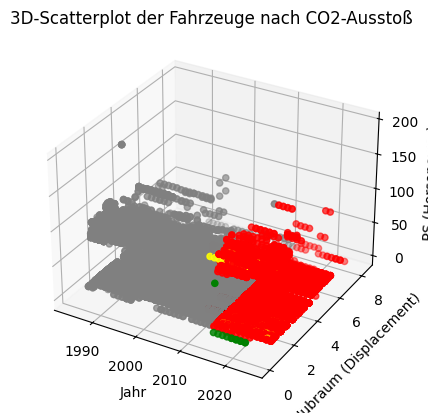

In [6]:
# Aufgabe 4 

import pandas as pd
import matplotlib.pyplot as plt




# Setz die Grenzen für die Co2 Klasse 
bins = [0, 50, 100, 150, float('inf')]  #Beispiele von Grenzen 
labels = ['Kein Ausstoß', 'Geringer Ausstoß', 'Moderat', 'Hoher Ausstoß']  # 4 Labels für 5 Bins

# Dieskredizierung der CO2 Spalte
df['CO2_category'] = pd.cut(df['co2'], bins=bins, labels=labels, right=False)

# Die Farben definieren 
colors = {
    'Kein Ausstoß': 'green',
    'Geringer Ausstoß': 'yellow',
    'Moderat': 'orange',
    'Hoher Ausstoß': 'red',
    'NaN': 'gray'  # 'gray' p NaN
}

# Neue Spalte für dei Farben erstellen 
df['CO2_category'] = df['CO2_category'].astype('category')  # Neue Spalte für die Kategorie erstellen 
df['CO2_category'] = df['CO2_category'].cat.add_categories('gray')  # 'gray' als Kategory

# Zuweisung der Farben abhängig von der Kategorien 
df['color'] = df['CO2_category'].map(colors)

#  NaN mit  'gray' ersetzen 
df['color'] = df['color'].fillna('gray')

#  scatter plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatterplot erstellen, z.B. mit Jahr, Hubraum (displ) und PS (hpv)
ax.scatter(df['year'], df['displ'], df['hpv'], c=df['color'])
ax.set_xlabel('Jahr')
ax.set_ylabel('Hubraum (Displacement)')
ax.set_zlabel('PS (Horsepower)')
plt.title('3D-Scatterplot der Fahrzeuge nach CO2-Ausstoß')
plt.show()

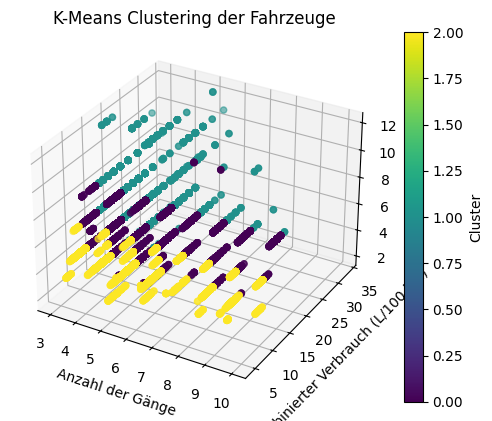

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Zuerst den kombinierten Verbrauch berechnen, bevor Zeilen mit NaN entfernt werden
df.loc[:, 'combined_consumption'] = 235.215 / df['comb08']  # Umrechnung in L/100 km

# Entferne Zeilen mit fehlenden Werten in den wichtigen Spalten
df = df.dropna(subset=['Gears', 'combined_consumption', 'cylinders'])

# Auswahl der Features für K-Means
features = df[['Gears', 'combined_consumption', 'cylinders']]

# K-Means Clustering anwenden
kmeans = KMeans(n_clusters=3, random_state=42)  # Wähle die Anzahl der Cluster nach Bedarf
df['cluster'] = kmeans.fit_predict(features)

# 3D-Scatterplot erstellen, um die Cluster anzuzeigen
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Gears'], df['combined_consumption'], df['cylinders'], c=df['cluster'], cmap='viridis')
ax.set_xlabel('Anzahl der Gänge')
ax.set_ylabel('Kombinierter Verbrauch (L/100 km)')
ax.set_zlabel('Anzahl der Zylinder')
plt.title('K-Means Clustering der Fahrzeuge')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [11]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

# Konvertiere CO2-Kategorien in numerische Werte, falls dies noch nicht geschehen ist
category_mapping = {'Kein Ausstoß': 0, 'Geringer Ausstoß': 1, 'Moderat': 2, 'Hoher Ausstoß': 3}
df['CO2_category_numeric'] = df['CO2_category'].map(category_mapping)

# Entferne Zeilen mit NaN-Werten in der CO2_category_numeric-Spalte und im Cluster
df = df.dropna(subset=['CO2_category_numeric', 'cluster'])

# Überprüfe, ob Cluster und CO2-Kategorien verfügbar sind
if 'CO2_category_numeric' in df.columns and 'cluster' in df.columns:
    # Mappe die Cluster-Labels auf die am häufigsten vorkommenden CO2-Kategorien in jedem Cluster
    cluster_labels = np.zeros_like(df['cluster'])
    for i in range(3):  # für 3 Cluster
        mask = df['cluster'] == i
        cluster_labels[mask] = mode(df.loc[mask, 'CO2_category_numeric'])[0]
    
    # Berechne die Accuracy zwischen den neu zugewiesenen Cluster-Labels und den CO2-Kategorien
    accuracy = accuracy_score(df['CO2_category_numeric'], cluster_labels)
    print(f'Accuracy: {accuracy:.2f}')
else:
    print("Stelle sicher, dass die Spalten 'CO2_category_numeric' und 'cluster' vorhanden sind.")




Accuracy: 1.00
